# **Import Modules**

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# **Loading and Analyzing FashionMNIST Dataset**

In [5]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **An Overview of the Images**

[8805, 37303, 55537, 52577, 50054, 4135, 16716, 7727, 32468, 49870, 29457, 30949, 42702, 24878, 51689, 13759]


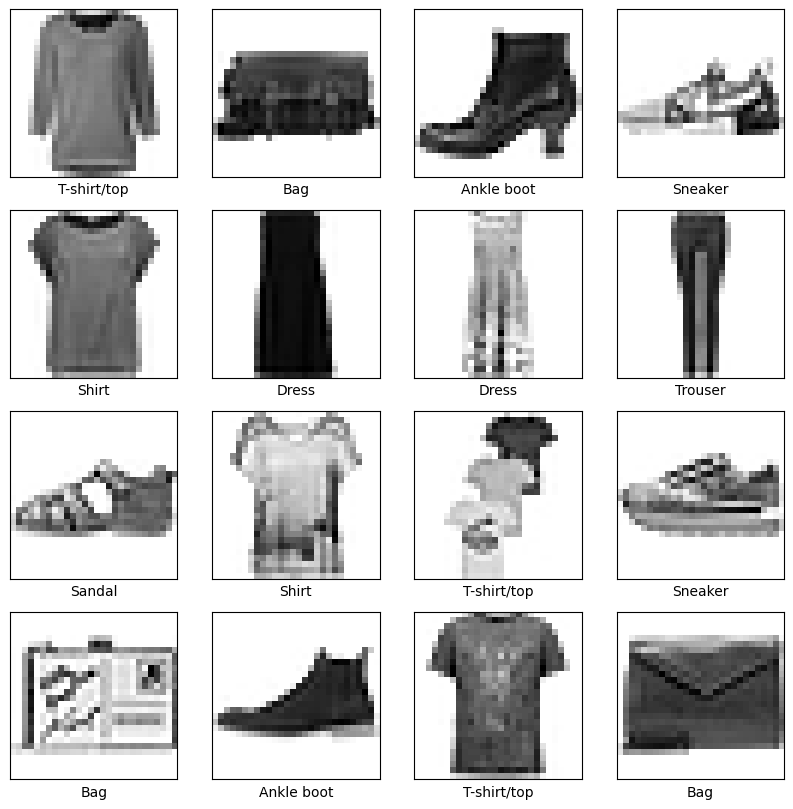

In [8]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)


plt.figure(figsize=(10, 10))

for i in range(len(sampler)):
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


# **Build, Compile, and Train the Model**

In [27]:
# normalize images
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000],test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:],test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATAET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

#train
model.fit(train_dataset,
          epochs=10,
          validation_data=validation_dataset)

_,accuracy = model.evaluate(test_dataset)
print(f"the model accuracy is {accuracy * 100: 0.1f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7498 - loss: 0.7299 - val_accuracy: 0.8472 - val_loss: 0.4417
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.4002 - val_accuracy: 0.8548 - val_loss: 0.4010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8737 - loss: 0.3489 - val_accuracy: 0.8692 - val_loss: 0.3737
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8816 - loss: 0.3245 - val_accuracy: 0.8700 - val_loss: 0.3546
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8897 - loss: 0.2992 - val_accuracy: 0.8654 - val_loss: 0.3705
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.2883 - val_accuracy: 0.8730 - val_loss: 0.3536
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8982 - loss: 0.2767 - val_accuracy: 0.8632 - val_loss: 0.3794
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8998 - loss: 0.2682 - val_accuracy: 0.8718 - val_

# **Evaluate the Model**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


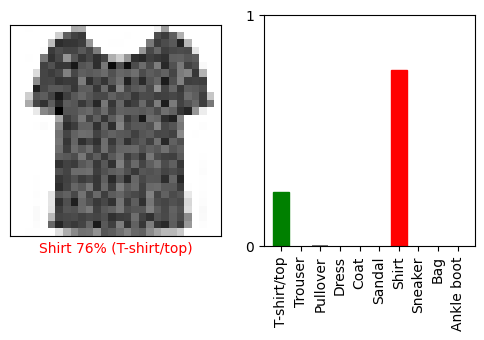

In [28]:
image_id = 1000 # pick any number between 0 and 9999 inclusive (we have 10000 test images)

predictions = model.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'

  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predicitons_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predicitons_array, color='#777777')
  plt.ylim([0, 1])

  predicted_label = np.argmax(predicitons_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(image_id, predictions[image_id],test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(image_id, predictions[image_id],test_labels)

_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

